# 概率论与统计

## 最大(极大)似然估计 | 对数最大(极大)似然估计
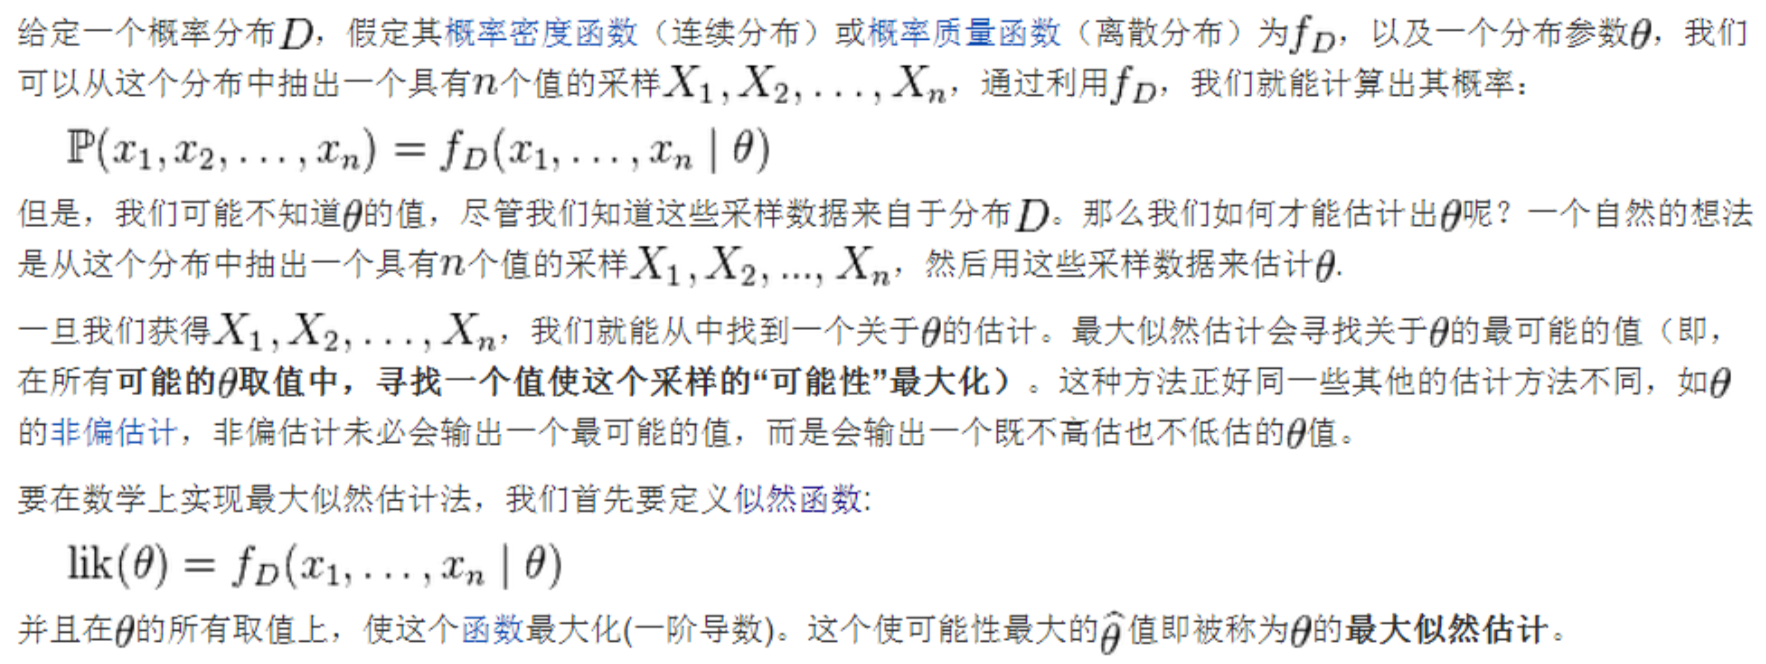

## 马尔科夫链蒙特卡罗（Markov Chain Monte Carlo，以下简称MCMC）
从名字我们可以看出，MCMC由两个MC组成，即蒙特卡罗方法（Monte Carlo Simulation，简称MC）和马尔科夫链（Markov Chain ，也简称MC）。要弄懂MCMC的原理我们首先得搞清楚蒙特卡罗方法和马尔科夫链的原理。我们将用三篇来完整学习MCMC。在本篇，我们关注于蒙特卡罗方法。

### 蒙特卡罗方法引入
https://www.cnblogs.com/pinard/p/6625739.html

# NLP相关

## EM算法
https://www.cnblogs.com/pinard/p/6912636.html  
EM算法也称期望最大化（Expectation-Maximum,简称EM）算法，它是一个基础算法，是很多机器学习领域算法的基础，比如隐式马尔科夫算法（HMM）， LDA主题模型的变分推断等等。本文就对EM算法的原理做一个总结。

### EM算法要解决的问题

我们经常会从样本观察数据中，找出样本的模型参数。 最常用的方法就是极大化模型分布的对数似然函数。

但是在一些情况下，我们得到的观察数据有未观察到的隐含数据，此时我们未知的有隐含数据和模型参数，因而无法直接用极大化对数似然函数得到模型分布的参数。怎么办呢？这就是EM算法可以派上用场的地方了。

EM算法解决这个的思路是使用启发式的迭代方法，
* 既然我们无法直接求出模型分布参数，
    * 那么我们可以先猜想隐含数据（EM算法的E步），如随机设置模型参数，求出隐含数据
    * 接着基于观察数据和猜测的隐含数据一起来极大化对数似然，求解我们的模型参数（EM算法的M步)。
* 由于我们之前的隐藏数据是猜测的，所以此时得到的模型参数一般还不是我们想要的结果。不过没关系，我们基于当前得到的模型参数，继续猜测隐含数据（EM算法的E步），然后继续极大化对数似然，求解我们的模型参数（EM算法的M步)。
* 以此类推，不断的迭代下去，直到模型分布参数基本无变化，算法收敛，找到合适的模型参数。

从上面的描述可以看出，EM算法是迭代求解最大值的算法，同时算法在每一次迭代时分为两步，E步和M步。一轮轮迭代更新隐含数据和模型分布参数，直到收敛，即得到我们需要的模型参数。

一个最直观了解EM算法思路的是K-Means算法，见之前写的K-Means聚类算法原理。在K-Means聚类时，每个聚类簇的质心是隐含数据。我们会假设𝐾个初始化质心，即EM算法的E步；然后计算得到每个样本最近的质心，并把样本聚类到最近的这个质心，即EM算法的M步。重复这个E步和M步，直到质心不再变化为止，这样就完成了K-Means聚类。

当然，K-Means算法是比较简单的，实际中的问题往往没有这么简单。上面对EM算法的描述还很粗糙，我们需要用数学的语言精准描述。

### EM算法的收敛性思考

　　　　EM算法的流程并不复杂，但是还有两个问题需要我们思考：

　　　　1） EM算法能保证收敛吗？

　　　　2） EM算法如果收敛，那么能保证收敛到全局最大值吗？　　

　　　　首先我们来看第一个问题, EM算法的收敛性。要证明EM算法收敛，则我们需要证明我们的对数似然函数的值在迭代的过程中一直在增大。即：
    
    
从上面的推导可以看出，EM算法可以保证收敛到一个稳定点，但是却不能保证收敛到全局的极大值点，因此它是局部最优的算法，当然，如果我们的优化目标𝐿(𝜃,𝜃𝑗)是凸的，则EM算法可以保证收敛到全局最大值，这点和梯度下降法这样的迭代算法相同。至此我们也回答了上面提到的第二个问题。

### EM算法的一些思考

如果我们从算法思想的角度来思考EM算法，我们可以发现我们的算法里已知的是观察数据，未知的是隐含数据和模型参数，在E步，我们所做的事情是固定模型参数的值，优化隐含数据的分布，而在M步，我们所做的事情是固定隐含数据分布，优化模型参数的值。比较下其他的机器学习算法，其实很多算法都有类似的思想。比如SMO算法（支持向量机原理(四)SMO算法原理），坐标轴下降法(Lasso回归算法： 坐标轴下降法与最小角回归法小结), 都使用了类似的思想来求解问题。

## 维特比(Viterbi)算法
维特比算法是一个通用的解码算法，是基于动态规划的求序列最短路径的方法。在文本挖掘的分词原理中我们已经讲到了维特比算法的一些细节。

既然是动态规划算法，那么就需要找到合适的局部状态，以及局部状态的递推公式。在HMM中，维特比算法定义了两个局部状态用于递推。

如果大家看过之前写的文本挖掘的分词原理中的维特比算法，就会发现这两篇之中的维特比算法稍有不同。主要原因是在中文分词时，我们没有观察状态和隐藏状态的区别，只有一种状态。但是维特比算法的核心是定义动态规划的局部状态与局部递推公式，这一点在中文分词维特比算法和HMM的维特比算法是相同的，也是维特比算法的精华所在。

维特比算法也是寻找序列最短路径的一个通用方法，和dijkstra算法有些类似，但是dijkstra算法并没有使用动态规划，而是贪心算法。同时维特比算法仅仅局限于求序列最短路径，而dijkstra算法是通用的求最短路径的方法。

### 应用1: 分词
维特比算法采用的是动态规划来解决这个最优分词问题的，动态规划要求局部路径也是最优路径的一部分，很显然我们的问题是成立的。首先我们看一个简单的分词例子："人生如梦境"。它的可能分词可以用下面的概率图表示：
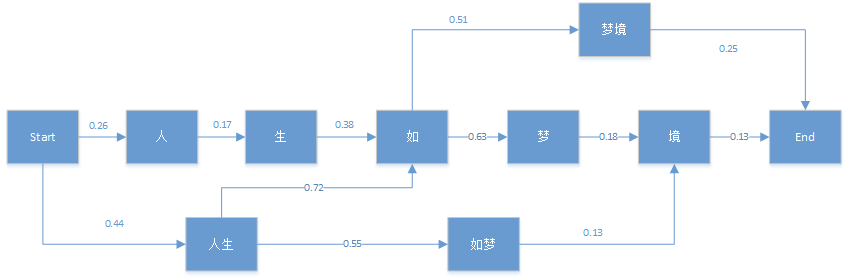

比如求\delta_t(梦境)=max(\delta_t-1(如))* a_如_梦境

按照动态规划的思路分析：
每一个字词(包括start,end)都是一个状态，那么上面的概率图可以转换为一个状态转移矩阵！

    start 人 生 如 梦 境 人生 如梦 梦境 end
    0 0.26 0 0 0 0 0.44 0 0 0
    0 0 0 0.17 0 0 0 0 0 0 0
    ...
    
初始概率分布pi=[1, 0...]

中间变量 \delta_t(i)表示在第t步,状态为i的最大概率, 则
$$\delta_{t+1}(i)=\delta_t(j)*a_{ji}$$
中间变量$\psi(i)$ 记录到达当前节点满足最大概率的前一节点位置

In [52]:
import numpy as np

In [53]:
# 状态转移概率矩阵
A = np.array([
    [0, 0.26, 0, 0, 0, 0, 0.44, 0, 0, 0],
    [0, 0, 0.17, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0.38, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0.63, 0, 0, 0, 0.51, 0],
    [0, 0, 0, 0, 0, 0.18, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.13],
    [0, 0, 0, 0.72, 0, 0, 0, 0.55, 0, 0],
    [0, 0, 0, 0, 0, 0.13, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.25],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])

不成功，这里最大的问题是使用每种分词的路径的序列长度是不同的。需要动脑子解决一下

In [ ]:

# 对一个序列[start 人 生 如 梦 境 end], 
pi=[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
o_series = [0, 1, 2, 3, 4, 5, 6]
delta=np.zeros([10, len(o_series)])
psi=[]
for i in range(len(o_series)):
    if i==0: delta[:,i]=pi
    else:
        。。。

### 应用1: HMM第三个基本问题：预测最优隐藏序列

## 马尔科夫过程

### 随机过程(过程)
设T是一无限实数集，把依赖于参数$t\in T$的一族(无限多个)随机变量称为随机过程，记为{X(t), $t\in T$}
### 状态|状态空间
我们常把t看作为时间，成X{t}为时刻t时过程的状态。

对于一切$t\in T$, X(t)所有可能去的一切智的全体称为随机过程的状态空间。
### 马尔可夫性(无后效性)
过程或系统在时刻t0所处的状态为已知的条件下，过程在时刻t>t0所处状态的条件分布与过程在时刻t0之前所处的状态无关。

通俗的说，就是在已知过程“现在”的条件下，其“将来”不依赖于“过去”
### 马尔科夫过程
符合马尔科夫性的过程
### 马氏链、齐次马氏链
时间和状态都是离散的马尔科夫过程称为马尔科夫链

如果转移概率矩阵P(t)与t无关，则称该马氏链是齐次马氏链
### 转移概率矩阵、一步转移概率矩阵
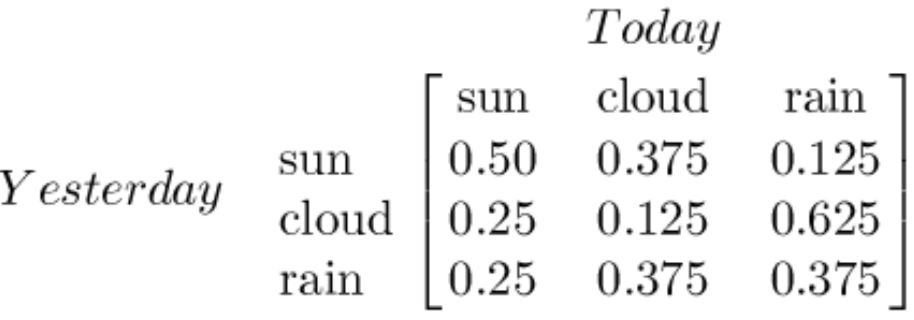

#### 求多步转移概率矩阵
C-K方程，转化为求一步转移概率矩阵的幂。

对于齐次马氏链而言，n步转移概率矩阵是一步转移概率矩阵的n次方

### 遍历性
即 n步转移概率 当n取极限时，和起始态无关，只与要转移到终态有关！
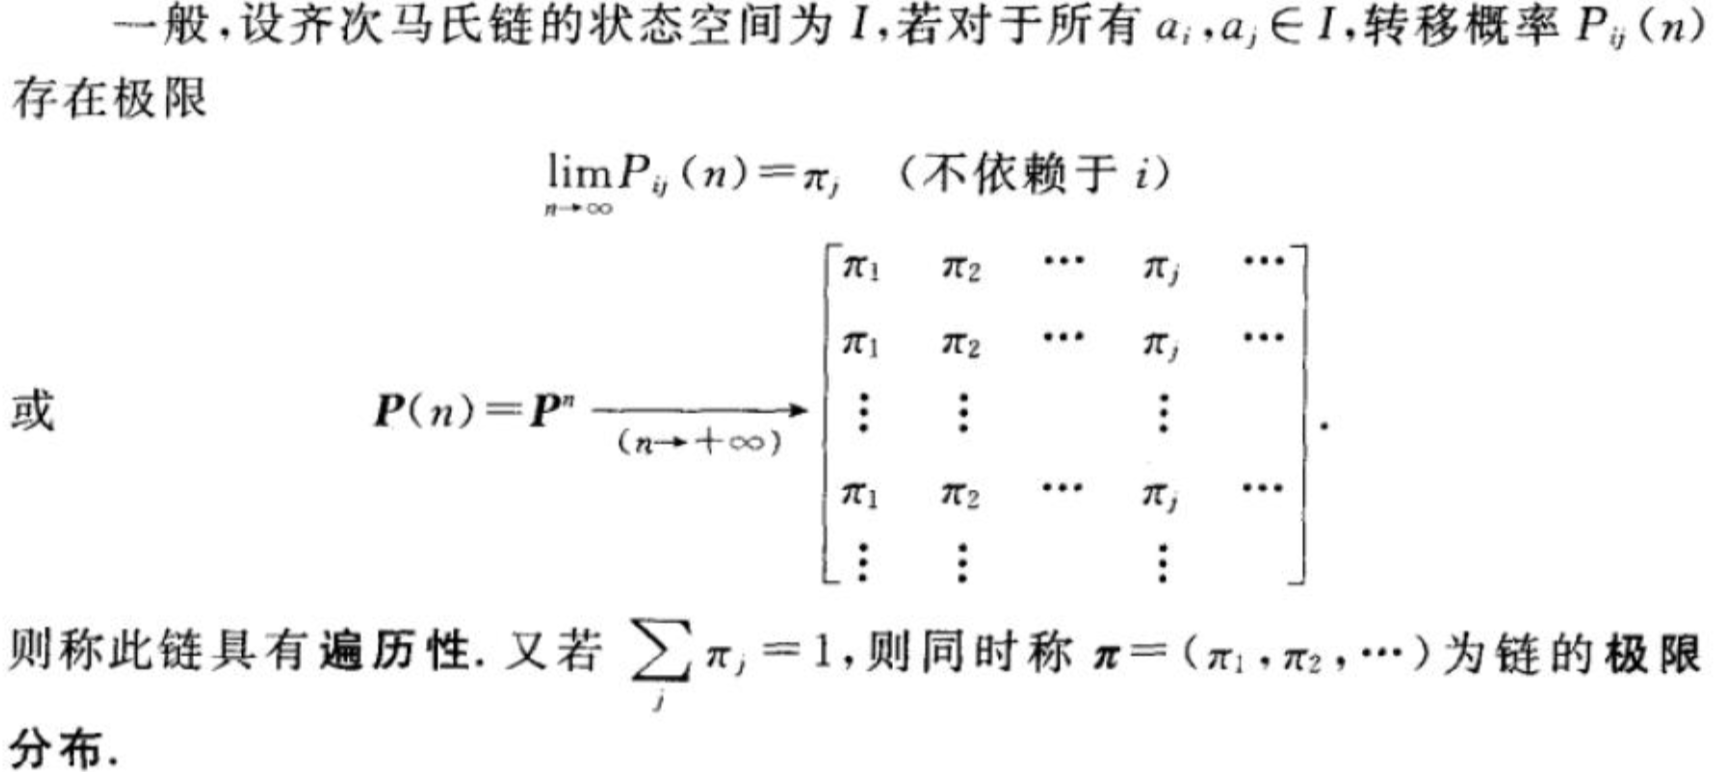

如果 转移概率矩阵中的值都大于0，在该马氏链具有遍历性！
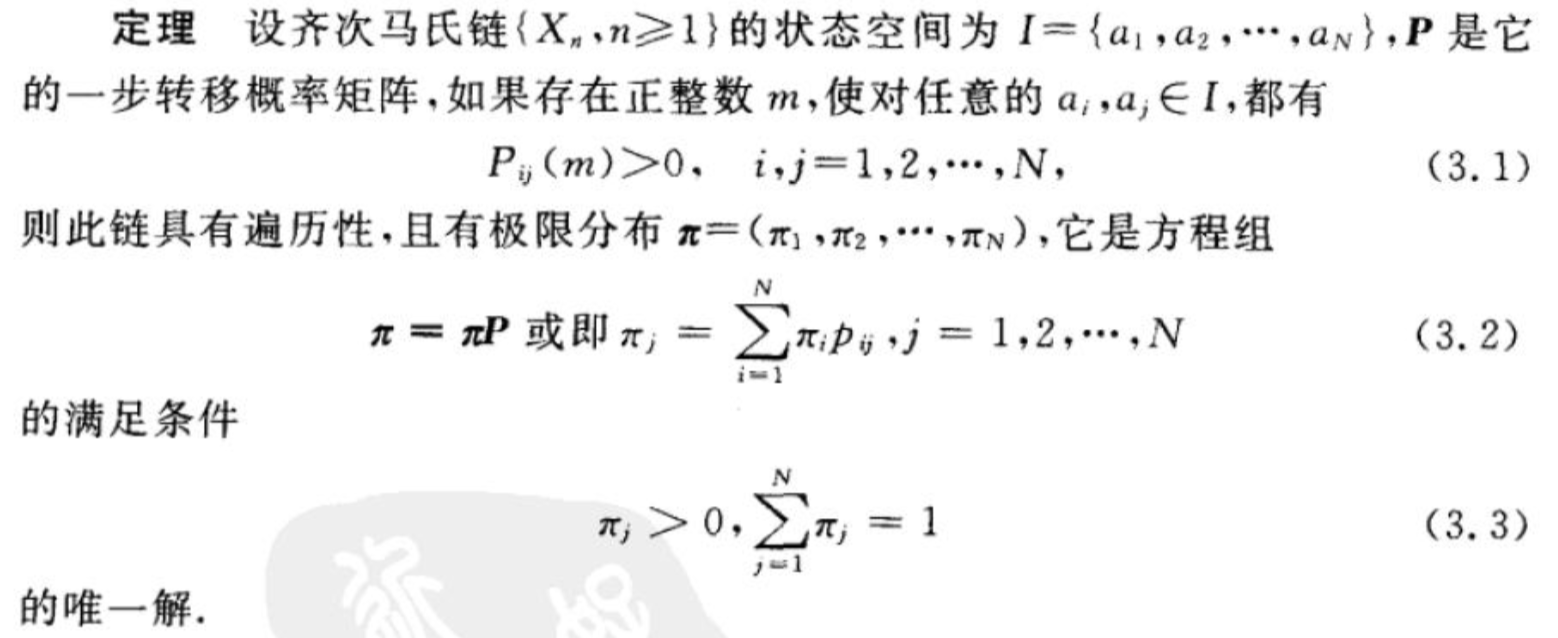

## 隐马尔科夫过程(HMM)
https://www.cnblogs.com/pinard/p/6945257.html

### 什么样的问题需要HMM模型
首先我们来看看什么样的问题解决可以用HMM模型。使用HMM模型时我们的问题一般有这两个特征：１）我们的问题是基于序列的，比如时间序列，或者状态序列。２）我们的问题中有两类数据，一类序列数据是可以观测到的，即观测序列；而另一类数据是不能观察到的，即隐藏状态序列，简称状态序列。

　　　　有了这两个特征，那么这个问题一般可以用HMM模型来尝试解决。这样的问题在实际生活中是很多的。比如：我现在在打字写博客，我在键盘上敲出来的一系列字符就是观测序列，而我实际想写的一段话就是隐藏序列，输入法的任务就是从敲入的一系列字符尽可能的猜测我要写的一段话，并把最可能的词语放在最前面让我选择，这就可以看做一个HMM模型了。再举一个，我在和你说话，我发出的一串连续的声音就是观测序列，而我实际要表达的一段话就是状态序列，你大脑的任务，就是从这一串连续的声音中判断出我最可能要表达的话的内容。

　　　　从这些例子中，我们可以发现，HMM模型可以无处不在。但是上面的描述还不精确，下面我们用精确的数学符号来表述我们的HMM模型。
### HMM模型的定义
对于HMM模型，首先我们假设𝑄是所有可能的隐藏状态的集合，𝑉是所有可能的观测状态的集合，即：
𝑄={𝑞1,𝑞2,...,𝑞𝑁},𝑉={𝑣1,𝑣2,...𝑣𝑀}

其中，𝑁是可能的隐藏状态数，𝑀是所有的可能的观察状态数。

对于一个长度为𝑇的序列，𝐼对应的状态序列, 𝑂是对应的观察序列，即：
𝐼={𝑖1,𝑖2,...,𝑖𝑇},𝑂={𝑜1,𝑜2,...𝑜𝑇}

其中，任意一个隐藏状态𝑖𝑡∈𝑄,任意一个观察状态𝑜𝑡∈𝑉
#### HMM模型做了两个很重要的假设

1） 齐次马尔科夫链假设。即任意时刻的隐藏状态只依赖于它前一个隐藏状态。

当然这样假设有点极端，因为很多时候我们的某一个隐藏状态不仅仅只依赖于前一个隐藏状态，可能是前两个或者是前三个。但是这样假设的好处就是模型简单，便于求解。如果在时刻𝑡的隐藏状态是𝑖𝑡=𝑞𝑖,在时刻𝑡+1的隐藏状态是𝑖𝑡+1=𝑞𝑗, 则从时刻𝑡到时刻𝑡+1的HMM状态转移概率𝑎𝑖𝑗可以表示为：
$$a_{ij}=P(i_{t+1}=q_j|i_t=q_i)$$
这样𝑎𝑖𝑗可以组成马尔科夫链的状态转移矩阵𝐴:
$$A=[a_{ij}]_{N*N}$$
2） 观测独立性假设。  
即任意时刻的观察状态只仅仅依赖于当前时刻的隐藏状态，这也是一个为了简化模型的假设。如果在时刻𝑡的隐藏状态是𝑖𝑡=𝑞𝑗, 而对应的观察状态为𝑜𝑡=𝑣𝑘, 则该时刻观察状态𝑣𝑘在隐藏状态𝑞𝑗下生成的概率为𝑏𝑗(𝑘),满足：
$$b_j(k)=P(o_t=v_k|i_t=q_j)$$
这样𝑏𝑗(𝑘)可以组成观测状态生成的概率矩阵𝐵:
$$B=[b_j(k)]_{N*M}$$

一个HMM模型，可以由隐藏状态初始概率分布$\Pi$, 状态转移概率矩阵𝐴和观测状态概率矩阵𝐵决定。$\Pi$,𝐴决定状态序列，𝐵决定观测序列。因此，HMM模型可以由一个三元组𝜆表示如下：
$$\lambda=(A,B,\Pi)$$

## HMM三个基本问题概述
* HMM三个基本问题涵盖很全面：
    * 评估观测序列概率 是求概率，标量值。
    * 最优参数 是优化问题
    * 预测问题 求的是最优路径。
* 要有耐心，有自信，克服心理障碍。第一个问题 评估观测序列概率和 第三个问题预测最有可能的隐藏状态序列，都是典型的动态规划问题，只要按照动态规划的思路，确定递推式，求解是很自然的事情。

## HMM三个基本问题1_评估观察序列概率
HMM模型一共有三个经典的问题需要解决：

* 1） 评估观察序列概率。即给定模型𝜆=(𝐴,𝐵,Π)和观测序列𝑂={𝑜1,𝑜2,...𝑜𝑇}，计算在模型𝜆下观测序列𝑂出现的概率𝑃(𝑂|𝜆)。  
这个问题的求解需要用到前向后向算法，我们在这个系列的第二篇会详细讲解。这个问题是HMM模型三个问题中最简单的。

前向后向算法是前向算法和后向算法的统称，这两个算法都可以用来求HMM观测序列的概率。我们先来看看前向算法是如何求解这个问题的。
### 前向算法
前向算法本质上属于动态规划的算法，也就是我们要通过找到局部状态递推的公式，这样一步步的从子问题的最优解拓展到整个问题的最优解。

在前向算法中，通过定义“前向概率”来定义动态规划的这个局部状态。

什么是前向概率呢, 其实定义很简单：定义时刻𝑡时隐藏状态为𝑞𝑖, 观测状态的序列为𝑜1,𝑜2,...𝑜𝑡的概率为前向概率。记为：
$$𝛼_𝑡(𝑖)=𝑃(𝑜1,𝑜2,...𝑜𝑡,𝑖𝑡=𝑞𝑖|𝜆)$$

基于动态觃划思想的格架算法
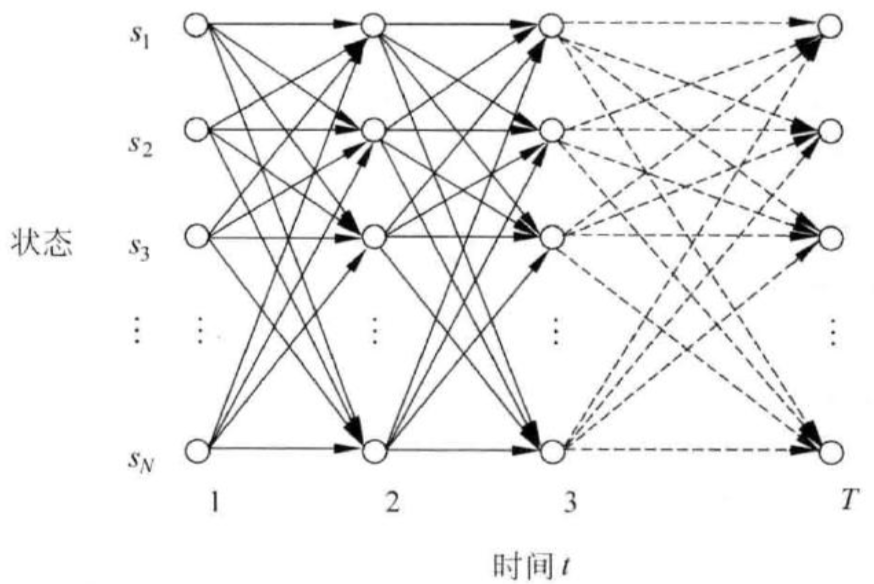

下面总结下前向算法。

输入：HMM模型𝜆=(𝐴,𝐵,Π)，观测序列𝑂=(𝑜1,𝑜2,...𝑜𝑇)

输出：观测序列概率𝑃(𝑂|𝜆)

1) 计算时刻1的各个隐藏状态前向概率：
$$𝛼_1(𝑖)=𝜋_𝑖𝑏_𝑖(𝑜_1),𝑖=1,2,...𝑁$$

2) 递推时刻2,3,...𝑇时刻的前向概率：
$$𝛼_{𝑡+1}(𝑖)=[\sum_{𝑗=1}^𝑁𝛼_𝑡(𝑗)𝑎_{𝑗𝑖}]𝑏_𝑖(𝑜_{𝑡+1}),𝑖=1,2,...𝑁$$
方框号里计算的是当t时刻所有的隐藏状态转移到状态i的概率，然后在乘以状态i时发射观测训练o_t+1

3) 计算最终结果：
$$𝑃(𝑂|𝜆)=\sum_{𝑖=1}^𝑁𝛼_𝑇(𝑖)$$

从递推公式可以看出，我们的算法时间复杂度是$𝑂(𝑇𝑁^2)$，比暴力解法的时间复杂度$𝑂(𝑇𝑁^𝑇)$少了几个数量级

### 后向算法(略)

### 应用实例1
* 𝑉={0，1}，𝑀=2
* 𝑄={盒子1，盒子2，盒子3}，𝑁=3

In [49]:
pi = [0.2,0.4,0.4]
A = np.array([
    [0.5, 0.2, 0.3],
    [0.3, 0.5, 0.2],
    [0.2, 0.3, 0.5]
])

In [50]:
B = np.array([
    [0.5, 0.5],
    [0.4, 0.6],
    [0.7, 0.3]
])
𝑂=[0, 1, 0]

In [51]:
for i in range(len(O)):
    if i==0: a = np.array(pi).reshape([3,1])*(B[:, O[i]].reshape([3,1]))
    else:
        a = (a*A).sum(axis=0).reshape([3,1])*(B[:, O[i]].reshape([3,1]))
print(a.sum())

0.130218


### 应用实例2
假设手里有三个不同的骰子。第一个骰子是我们平常见的骰子(称这个骰子为D6)， 6个面，每个面(1，2，3，4，5，6)出现的概率是1/6。第二个骰子是个四面体(称 这个骰子为D4)，每个面(1，2，3，4)出现的概率是1/4。第三个骰子有八个面 (称这个骰子为D8)，每个面(1，2，3，4，5，6，7，8)出现的概率是1/8。求出现可观测序列为“1635273524”的概率
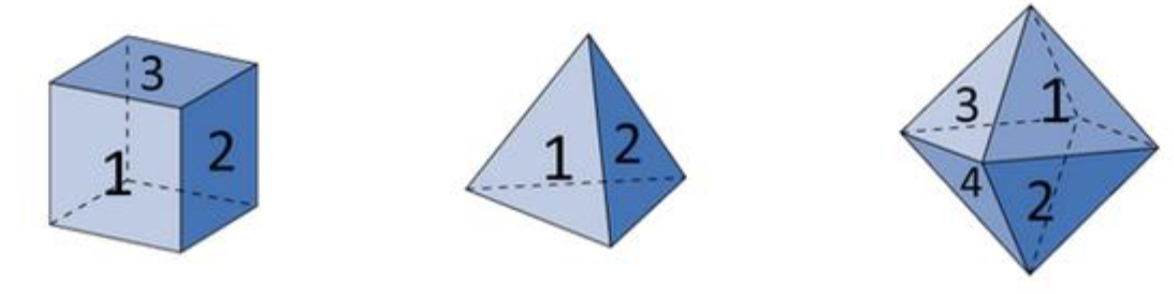

In [1]:
import numpy as np

In [2]:
A = np.ones([3,3])*1/3
A

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333]])

In [9]:
B = np.array([
    [1/6, 1/6, 1/6, 1/6, 1/6, 1/6, 0, 0,],
    [1/4, 1/4, 1/4, 0, 0, 0, 0, 0,],
    [1/4, 1/4, 1/4, 1/4, 1/4, 1/4, 1/4, 1/4],
])
B

array([[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667, 0.        , 0.        ],
       [0.25      , 0.25      , 0.25      , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
        0.25      , 0.25      , 0.25      ]])

In [8]:
pi = np.array([[1/3, 1/3, 1/3]]).T
pi

array([[0.33333333],
       [0.33333333],
       [0.33333333]])

In [24]:
o_series = [int(i) for i in '1635273524']
o_series

[1, 6, 3, 5, 2, 7, 3, 5, 2, 4]

In [22]:
a1 = pi * (B[:,0].reshape([3, 1]))
a1

array([[0.05555556],
       [0.08333333],
       [0.08333333]])

In [21]:
a1 * A

array([[0.01851852, 0.01851852, 0.01851852],
       [0.02777778, 0.02777778, 0.02777778],
       [0.02777778, 0.02777778, 0.02777778]])

In [23]:
a2 = (a1 * A).sum(axis=0).reshape([3, 1])*(B[:,6-1].reshape([3, 1]))
a2

array([[0.01234568],
       [0.        ],
       [0.01851852]])

In [45]:
result = np.zeros([3, 10])  # 用于记录每一步的前向概率ai

In [41]:
result[:, 0] = (pi * (B[:,0].reshape([3, 1]))).reshape(3)

In [40]:
(pi * (B[:,0].reshape([3, 1]))).reshape(3)

array([0.05555556, 0.08333333, 0.08333333])

In [43]:
for i in range(len(o_series)):
    if i==0: result[:, i] = (pi * (B[:,0].reshape([3, 1]))).reshape(3)
    else: result[:, i] = ((result[:, i-1].reshape([3, 1]) * A).sum(axis=0).reshape([3, 1])*(B[:,o_series[i]-1].reshape([3, 1]))).reshape(3)
print(result)

[[5.55555556e-02 1.23456790e-02 1.71467764e-03 3.81039476e-04
  5.29221494e-05 0.00000000e+00 9.80039804e-07 2.17786623e-07
  3.02481421e-08 6.72180935e-09]
 [8.33333333e-02 0.00000000e+00 2.57201646e-03 0.00000000e+00
  7.93832241e-05 0.00000000e+00 1.47005971e-06 0.00000000e+00
  4.53722131e-08 0.00000000e+00]
 [8.33333333e-02 1.85185185e-02 2.57201646e-03 5.71559214e-04
  7.93832241e-05 1.76407165e-05 1.47005971e-06 3.26679935e-07
  4.53722131e-08 1.00827140e-08]]


In [44]:
# 答案
result[:, -1].sum()

1.680452338354945e-08

### HMM三个基本问题2_模型参数学习问题
* 2）模型参数学习问题。即给定观测序列𝑂={𝑜1,𝑜2,...𝑜𝑇}，估计模型𝜆=(𝐴,𝐵,Π)的参数，使该模型下观测序列的条件概率𝑃(𝑂|𝜆)最大。  
这个问题的求解需要用到基于EM算法的鲍姆-韦尔奇算法， 我们在这个系列的第三篇会详细讲解。这个问题是HMM模型三个问题中最复杂的。
#### HMM模型参数求解概述
HMM模型参数求解根据已知的条件可以分为两种情况。
* 第一种情况较为简单，就是我们已知𝐷个长度为𝑇的观测序列和对应的隐藏状态序列，  
即{(𝑂1,𝐼1),(𝑂2,𝐼2),...(𝑂𝐷,𝐼𝐷)}是已知的，此时我们可以很容易的用最大似然来求解模型参数。即通过统计的方法！

假设样本从隐藏状态𝑞𝑖转移到𝑞𝑗的频率计数是𝐴𝑖𝑗,那么状态转移矩阵求得为：。。。

可见第一种情况下求解模型还是很简单的。

但是在很多时候，我们无法得到HMM样本观察序列对应的隐藏序列，只有𝐷个长度为𝑇的观测序列，即{(𝑂1),(𝑂2),...(𝑂𝐷)}是已知的，此时我们能不能求出合适的HMM模型参数呢？这就是我们的第二种情况，也是我们本文要讨论的重点。

它的解法最常用的是鲍姆-韦尔奇算法，其实就是基于EM算法的求解，只不过鲍姆-韦尔奇算法出现的时代，EM算法还没有被抽象出来，所以我们本文还是说鲍姆-韦尔奇算法。

### 鲍姆-韦尔奇算法原理

鲍姆-韦尔奇算法原理既然使用的就是EM算法的原理，那么我们需要在E步求出联合分布$𝑃(𝑂,𝐼|𝜆)$基于条件概率$𝑃(𝐼|𝑂,\overline{𝜆})$的期望，其中$\overline{𝜆}$为当前的模型参数，然后再M步最大化这个期望，得到更新的模型参数𝜆。接着不停的进行EM迭代，直到模型参数的值收敛为止。

首先来看看E步，当前模型参数为$\overline{𝜆}$, 联合分布𝑃(𝑂,𝐼|𝜆)基于条件概率$𝑃(𝐼|𝑂,overline{𝜆})$的期望表达式为

### 鲍姆-韦尔奇算法流程总结

这里我们概括总结下鲍姆-韦尔奇算法的流程。

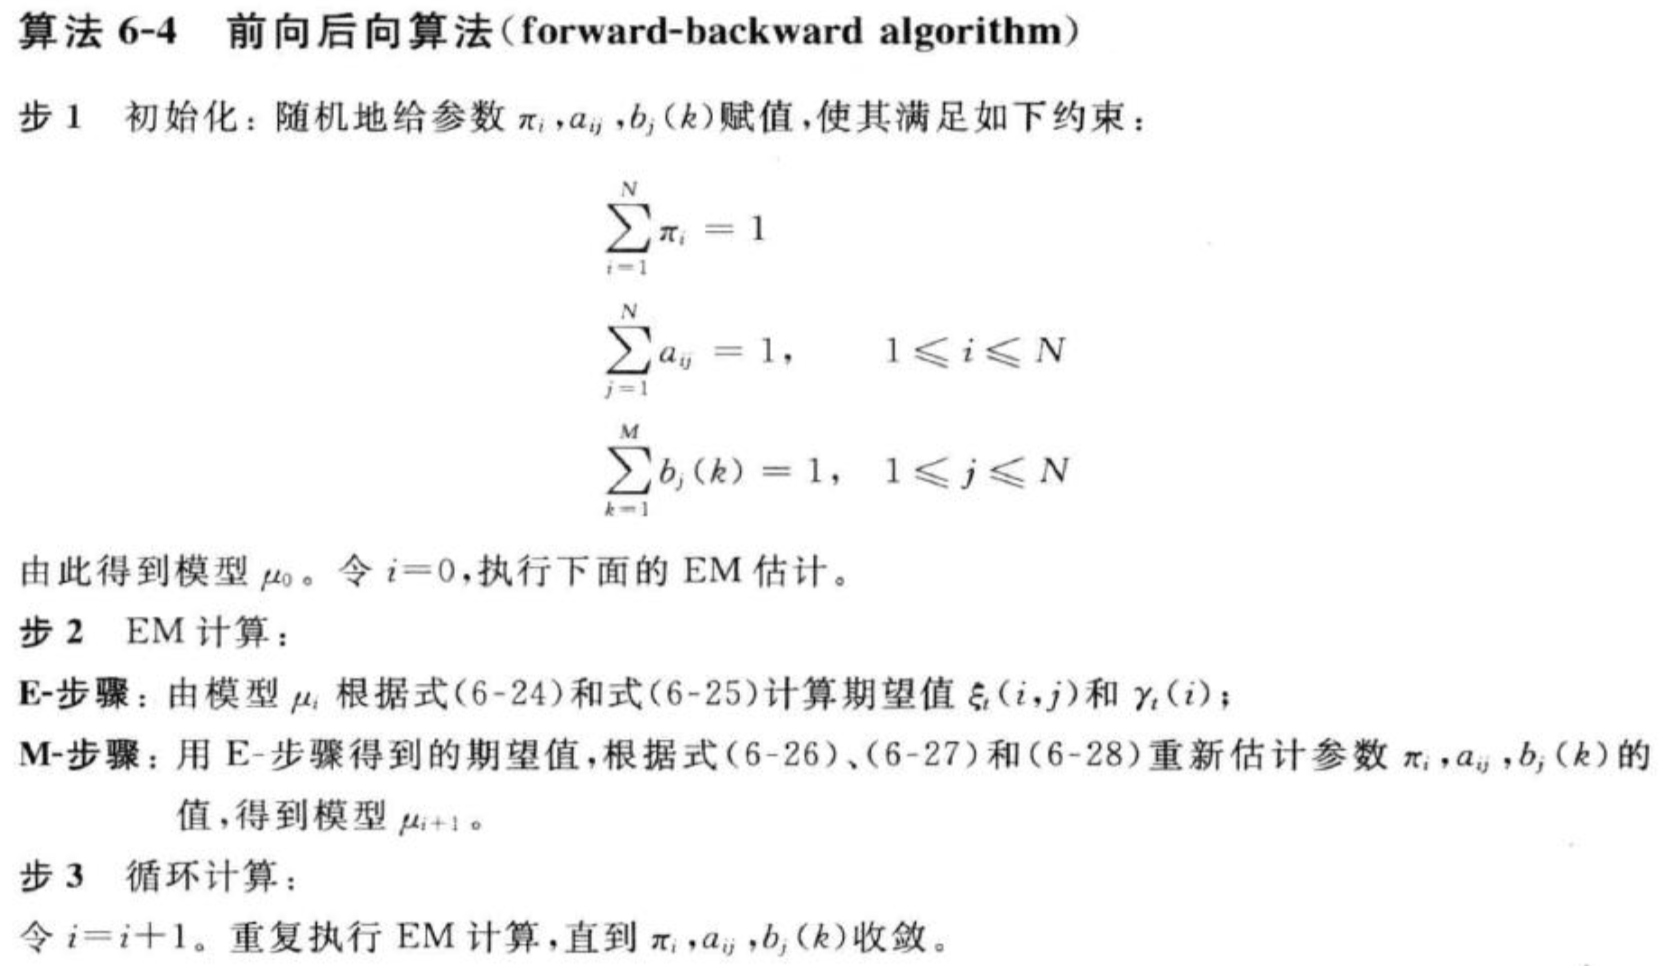
输入： 𝐷个观测序列样本{(𝑂1),(𝑂2),...(𝑂𝐷)}

输出：HMM模型参数

* 1)随机初始化所有的𝜋𝑖,𝑎𝑖𝑗,𝑏𝑗(𝑘)
* 2) 对于每个样本𝑑=1,2,...𝐷，用前向后向算法计算$𝛾^{(𝑑)}_𝑡(𝑖)，𝜉^{(𝑑)}_𝑡(𝑖,𝑗),𝑡=1,2...𝑇$
    * 给定模型𝜆和观测序列𝑂,在时刻𝑡处于状态𝑞𝑖的概率记为:
    $$\gamma_t(i)=P(i_t=q_i|\lambda,O)$$
* 3)更新模型参数：
* 4) 如果𝜋𝑖,𝑎𝑖𝑗,𝑏𝑗(𝑘)的值已经收敛，则算法结束，否则回到第2）步继续迭代。

以上就是鲍姆-韦尔奇算法的整个过程。

## HMM三个基本问题3_预测问题，也称为解码问题
* 3）预测问题，也称为解码问题。即给定模型𝜆=(𝐴,𝐵,Π)和观测序列𝑂={𝑜1,𝑜2,...𝑜𝑇}，求给定观测序列条件下，最可能出现的对应的状态序列，这个问题的求解需要用到基于动态规划的维特比算法，我们在这个系列的第四篇会详细讲解。  
这个问题是HMM模型三个问题中复杂度居中的算法。

https://www.cnblogs.com/pinard/p/6991852.html

HMM模型的解码问题最常用的算法是维特比算法，当然也有其他的算法可以求解这个问题。同时维特比算法是一个通用的求序列最短路径的动态规划算法，也可以用于很多其他问题，比如之前讲到的文本挖掘的分词原理中我们讲到了单独用维特比算法来做分词。


中间变量1: $\delta_t(i)$: 指在t时刻，隐藏状态为i，观测序列为o1o2..ot的最大概率。则：
$$\delta_{t+1}(i)=max^N_{j=1}[\delta_t(j)*a_{ji}]*b_j(o_{t+1})$$

中间变量2: $\psi_t(i)$: 指在t时刻，隐藏状态为i的的所有单个状态转移路径(𝑖1,𝑖2,...,𝑖𝑡−1,𝑖)中概率最大的转移路径中第𝑡−1个节点的隐藏状态为Ψ𝑡(𝑖),其递推表达式可以表示为：
$$Ψ𝑡(𝑖)=𝑎𝑟𝑔max_{1≤𝑗≤𝑁}[𝛿_{𝑡−1}(𝑗)𝑎_{𝑗𝑖}]$$

有了这两个局部状态，我们就可以从时刻0一直递推到时刻𝑇
，然后利用Ψ𝑡(𝑖)记录的前一个最可能的状态节点回溯，直到找到最优的隐藏状态序列。
最后的答案:
$$Q=max^N_{i=1}\delta_T(i)$$

# CRF
https://www.cnblogs.com/pinard/p/7048333.html

条件随机场(Conditional Random Fields, 以下简称CRF)是给定一组输入序列条件下另一组输出序列的条件概率分布模型，在自然语言处理中得到了广泛应用。本系列主要关注于CRF的特殊形式：线性链(Linear chain) CRF。本文关注与CRF的模型基础。

## CRF模型的应用场景
和HMM类似，在讨论CRF之前，我们来看看什么样的问题需要CRF模型。这里举一个简单的例子：

　　　　假设我们有Bob一天从早到晚的一系列照片，Bob想考考我们，要我们猜这一系列的每张照片对应的活动，比如: 工作的照片，吃饭的照片，唱歌的照片等等。一个比较直观的办法就是，我们找到Bob之前的日常生活的一系列照片，然后找Bob问清楚这些照片代表的活动标记，这样我们就可以用监督学习的方法来训练一个分类模型，比如逻辑回归，接着用模型去预测这一天的每张照片最可能的活动标记。

　　　　这种办法虽然是可行的，但是却忽略了一个重要的问题，就是这些照片之间的顺序其实是有很大的时间顺序关系的，而用上面的方法则会忽略这种关系。比如我们现在看到了一张Bob闭着嘴的照片，那么这张照片我们怎么标记Bob的活动呢？比较难去打标记。但是如果我们有Bob在这一张照片前一点点时间的照片的话，那么这张照片就好标记了。如果在时间序列上前一张的照片里Bob在吃饭，那么这张闭嘴的照片很有可能是在吃饭咀嚼。而如果在时间序列上前一张的照片里Bob在唱歌，那么这张闭嘴的照片很有可能是在唱歌。

　　　　为了让我们的分类器表现的更好，可以在标记数据的时候，可以考虑相邻数据的标记信息。这一点，是普通的分类器难以做到的。而这一块，也是CRF比较擅长的地方。

　　　　在实际应用中，自然语言处理中的词性标注(POS Tagging)就是非常适合CRF使用的地方。词性标注的目标是给出一个句子中每个词的词性（名词，动词，形容词等）。而这些词的词性往往和上下文的词的词性有关，因此，使用CRF来处理是很适合的，当然CRF不是唯一的选择，也有很多其他的词性标注方法。

## 相关概念

### 随机场
首先，我们来看看什么是随机场。“随机场”的名字取的很玄乎，其实理解起来不难。随机场是由若干个位置组成的整体，当给每一个位置中按照某种分布随机赋予一个值之后，其全体就叫做随机场。

还是举词性标注的例子：假如我们有一个十个词形成的句子需要做词性标注。这十个词每个词的词性可以在我们已知的词性集合（名词，动词...)中去选择。当我们为每个词选择完词性后，这就形成了一个随机场。
### 马尔科夫随机场

了解了随机场，我们再来看看马尔科夫随机场。马尔科夫随机场是随机场的特例，它假设随机场中某一个位置的赋值仅仅与和它相邻的位置的赋值有关，和与其不相邻的位置的赋值无关。继续举十个词的句子词性标注的例子：　如果我们假设所有词的词性只和它相邻的词的词性有关时，这个随机场就特化成一个马尔科夫随机场。比如第三个词的词性除了与自己本身的位置有关外，只与第二个词和第四个词的词性有关。　

### 条件随机场

理解了马尔科夫随机场，再理解CRF就容易了。

CRF是马尔科夫随机场的特例，它假设马尔科夫随机场中只有𝑋和𝑌两种变量，𝑋一般是给定的，而𝑌一般是在给定𝑋的条件下我们的输出。

这样马尔科夫随机场就特化成了条件随机场。

在我们十个词的句子词性标注的例子中，𝑋是词，𝑌是词性。因此，如果我们假设它是一个马尔科夫随机场，那么它也就是一个CRF。

对于CRF，我们给出准确的数学语言描述：

设𝑋与𝑌是随机变量，𝑃(𝑌|𝑋)是给定𝑋时𝑌的条件概率分布，若随机变量𝑌构成的是一个马尔科夫随机场，则称条件概率分布𝑃(𝑌|𝑋)是条件随机场。

### 线性链条件随机场
注意在CRF的定义中，我们并没有要求𝑋和𝑌有相同的结构。而实现中，我们一般都假设𝑋和𝑌有相同的结构，即:
$$𝑋=(𝑋1,𝑋2,...𝑋𝑛),𝑌=(𝑌1,𝑌2,...𝑌𝑛)$$

　　　　我们一般考虑如下图所示的结构：𝑋
和𝑌有相同的结构的CRF就构成了线性链条件随机场(Linear chain Conditional Random Fields,以下简称 linear-CRF)。

我们再来看看 linear-CRF的数学定义：

　　　　设𝑋=(𝑋1,𝑋2,...𝑋𝑛),𝑌=(𝑌1,𝑌2,...𝑌𝑛)
均为线性链表示的随机变量序列，在给定随机变量序列𝑋的情况下，随机变量𝑌的条件概率分布𝑃(𝑌|𝑋)构成条件随机场，即满足马尔科夫性：
𝑃(𝑌𝑖|𝑋,𝑌1,𝑌2,...𝑌𝑛)=𝑃(𝑌𝑖|𝑋,𝑌𝑖−1,𝑌𝑖+1)

　　　　则称𝑃(𝑌|𝑋)
为线性链条件随机场。

### 特征函数和其权重系数

对于上一节讲到的linear-CRF，我们如何将其转化为可以学习的机器学习模型呢？这是通过特征函数和其权重系数来定义的。什么是特征函数呢？
#### 节点特征函数
在linear-CRF中，特征函数分为两类，第一类是定义在𝑌节点上的节点特征函数，这类特征函数只和当前节点有关，记为：
$$𝑠_𝑙(𝑦_𝑖,𝑥,𝑖),𝑙=1,2,...𝐿$$

其中𝐿是定义在该节点的节点特征函数的总个数，𝑖是当前节点在序列的位置
#### 局部特征函数
第二类是定义在𝑌上下文的局部特征函数，这类特征函数只和当前节点和上一个节点有关，记为：
$$𝑡_𝑘(𝑦_{𝑖−1},𝑦_𝑖,𝑥,𝑖),𝑘=1,2,...𝐾$$
其中𝐾是定义在该节点的局部特征函数的总个数，𝑖是当前节点在序列的位置。之所以只有上下文相关的局部特征函数，没有不相邻节点之间的特征函数，是因为我们的linear-CRF满足马尔科夫性。

无论是节点特征函数还是局部特征函数，它们的取值只能是0或者1。即满足特征条件或者不满足特征条件。同时，我们可以为每个特征函数赋予一个权值，用以表达我们对这个特征函数的信任度。假设𝑡𝑘的权重系数是𝜆𝑘,𝑠𝑙的权重系数是𝜇𝑙,则linear-CRF由我们所有的𝑡𝑘,𝜆𝑘,𝑠𝑙,𝜇𝑙

共同决定。

此时我们得到了linear-CRF的参数化形式如下：
$$P(y|x)=\frac{1}{Z(x)}exp(\sum_{i,k}\lambda_kt_k(𝑦_{𝑖−1},𝑦_𝑖,𝑥,𝑖)+\sum_{i,l}\mu_ls_\mu(𝑦_𝑖,𝑥,𝑖))$$

其中，𝑍(𝑥)为规范化因子：
$$Z(x)=\sum_yexp(\sum_{i,k}\lambda_kt_k(𝑦_{𝑖−1},𝑦_𝑖,𝑥,𝑖)+\sum_{i,l}\mu_ls_\mu(𝑦_𝑖,𝑥,𝑖))$$

## 线性链条件随机场实例
这里我们给出一个linear-CRF用于词性标注的实例，为了方便，我们简化了词性的种类。假设输入的都是三个词的句子，即𝑋=(𝑋1,𝑋2,𝑋3),输出的词性标记为𝑌=(𝑌1,𝑌2,𝑌3),其中𝑌∈{1(名词)，2(动词)}

这里只标记出取值为1的特征函数如下：
$$𝑡_1=𝑡_1(𝑦_{𝑖−1}=1,𝑦_𝑖=2,𝑥,𝑖),𝑖=2,3,𝜆_1=1$$

$$𝑡_2=𝑡_2(𝑦_1=1,𝑦_2=1,𝑥,2),𝜆_2=0.5$$

$$𝑡_3=𝑡_3(𝑦_2=2,𝑦_3=1,𝑥,3),𝜆_3=1$$

$$𝑡_4=𝑡_4(𝑦_1=2,𝑦_2=1,𝑥,2),𝜆_4=1$$

$$𝑡_5=𝑡_5(𝑦_2=2,𝑦_3=2,𝑥,3),𝜆_5=0.2$$

$$𝑠_1=𝑠_1(𝑦_1=1,𝑥,1),𝜇_1=1$$

$$𝑠_2=𝑠_2(𝑦_𝑖=2,𝑥,𝑖),𝑖=1,2,𝜇_2=0.5$$

$$𝑠_3=𝑠_3(𝑦_𝑖=1,𝑥,𝑖),𝑖=2,3,𝜇_3=0.8$$

$$𝑠_4=𝑠_4(𝑦_3=2,𝑥,3),𝜇_4=0.5$$

　　　　求标记(1,2,2)的非规范化概率。



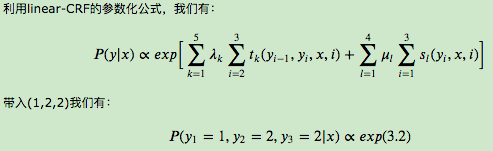

## 线性链条件随机场的简化形式

在上几节里面，我们用𝑠𝑙表示节点特征函数，用𝑡𝑘表示局部特征函数，同时也用了不同的符号表示权重系数，导致表示起来比较麻烦。其实我们可以对特征函数稍加整理，将其统一起来。

假设我们在某一节点我们有𝐾1个局部特征函数和𝐾2个节点特征函数，总共有𝐾=𝐾1+𝐾2个特征函数。我们用一个特征函数𝑓𝑘(𝑦𝑖−1,𝑦𝑖,𝑥,𝑖)来统一表示如下:
$$f_k(y_{i-1},y_i, x,i)= \begin{cases} t_k(y_{i-1},y_i, x,i) & {k=1,2,...K_1}\\ s_l(y_i, x,i)& {k=K_1+l,\; l=1,2...,K_2} \end{cases}$$

## 线性链条件随机场的矩阵形式

将上一节统一后的linear-CRF公式加以整理，我们还可以将linear-CRF的参数化形式写成矩阵形式。为此我们定义一个𝑚×𝑚的矩阵𝑀，𝑚为𝑦所有可能的状态的取值个数。𝑀定义如下：
$$M_i(x) = \Big[ M_i(y_{i-1},y_i |x)\Big] =  \Big[  exp(W_i(y_{i-1},y_i |x))\Big] = \Big[  exp(\sum\limits_{k=1}^Kw_kf_k(y_{i-1},y_i, x,i))\Big]$$
我们引入起点和终点标记𝑦0=𝑠𝑡𝑎𝑟𝑡,𝑦𝑛+1=𝑠𝑡𝑜𝑝, 这样，标记序列𝑦的规范化概率可以通过𝑛+1个矩阵元素的乘积得到，即：
$$P_w(y|x) =  \frac{1}{Z_w(x)}\prod_{i=1}^{n+1}M_i(y_{i-1},y_i |x)$$
其中𝑍𝑤(𝑥)

为规范化因子。

 

　　　　以上就是linear-CRF的模型基础，后面我们会讨论linear-CRF和HMM类似的三个问题的求解方法。

## linear-CRF的三个基本问题
在隐马尔科夫模型HMM中，我们讲到了HMM的三个基本问题，而linear-CRF也有三个类似的的基本问题。不过和HMM不同，在linear-CRF中，我们对于给出的观测序列𝑥是一直作为一个整体看待的，也就是不会拆开看(𝑥1,𝑥2,...)，因此linear-CRF的问题模型要比HMM简单一些，如果你很熟悉HMM，那么CRF的这三个问题的求解就不难了。

* linear-CRF第一个问题是评估，即给定 linear-CRF的条件概率分布𝑃(𝑦|𝑥), 在给定输入序列𝑥和输出序列𝑦时，计算条件概率𝑃(𝑦𝑖|𝑥)和𝑃(𝑦𝑖−1，𝑦𝑖|𝑥)以及对应的期望. 本文接下来会详细讨论问题一。

* linear-CRF第二个问题是学习，即给定训练数据集𝑋和𝑌，学习linear-CRF的模型参数𝑤𝑘和条件概率𝑃𝑤(𝑦|𝑥)，这个问题的求解比HMM的学习算法简单的多，普通的梯度下降法，拟牛顿法都可以解决。

* linear-CRF第三个问题是解码，即给定 linear-CRF的条件概率分布𝑃(𝑦|𝑥),和输入序列𝑥, 计算使条件概率最大的输出序列𝑦。类似于HMM，使用维特比算法可以很方便的解决这个问题。　

## 条件随机场CRF(二) 前向后向算法评估标记序列概率
https://www.cnblogs.com/pinard/p/7055072.html